# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [2]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
232 µs ± 64.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 92.90 MiB, increment: 0.21 MiB


SIZE:  1000
Timing: 
33.4 ms ± 7.04 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 113.87 MiB, increment: 20.96 MiB


SIZE:  10000
Timing: 
2.46 s ± 236 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 2368.45 MiB, increment: 2275.95 MiB




***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

In [4]:
print(main.absolut_error(5, 5.2))
print(main.relative_error(5, 5.2))

0.20000000000000018
0.040000000000000036


***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


8.326672684688674e-17
0.0
0.0
1.7208456881689926e-15
0.0
0.09999999999999998


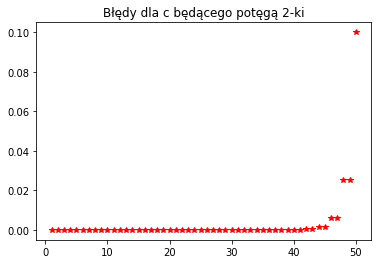

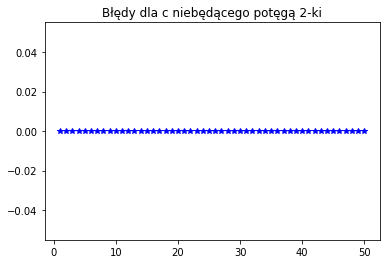

In [12]:
print(main.p_diff(1,0.1))
print(main.p_diff(2,0.125))
print(main.p_diff(3,0.25))
print(main.p_diff(4,0.33))
print(main.p_diff(10,0.5))
print(main.p_diff(50,0.6))
plt.figure()
for i in range(1, 51):
    plt.plot(i, main.p_diff(i,0.6), 'r*')
plt.title('Błędy dla c będącego potęgą 2-ki')
plt.show()
plt.figure()
for j in range(1, 51):
    plt.plot(j, main.p_diff(j,0.5), 'b*')
plt.title('Błędy dla c niebędącego potęgą 2-ki')    
plt.show()

Wyniki albo zwracają 0.0 (dla c będących potęgą dwójki), albo przybliżenie zera (dla c niebędących potęgą dwójki), stąd numeryczny wynik jest tylko przybliżeniem 0, co obrazują wykresy. Występuje tutaj typ błędu metody i zaokrągleń. 

***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

In [17]:
a = main.exponential(4,5)
b = main.exponential(4,10)
c = main.exponential(4,24)
d = main.exponential(4,100)
good = np.exp(4)

print(a, main.absolut_error(a, good), main.relative_error(a, good))
print(b, main.absolut_error(b, good), main.relative_error(a, good))
print(c, main.absolut_error(c, good), main.relative_error(a, good))
print(d, main.absolut_error(d, good), main.relative_error(a, good))
print(good)

34.33333333333333 20.264816699810908 0.590237379606143
54.15414462081129 0.4440054123329489 0.590237379606143
54.598150032604906 5.393303581513464e-10 0.590237379606143
54.598150033144265 2.842170943040401e-14 0.590237379606143
54.598150033144236


Mamy tutaj do czynienia z błędem przybliżenia. Im większe n tym błąd mniejszy (dążacy do zera). Należy również pamiętać, że przy zbyt dużym n będzie wyrzucało program, ponieważ float nie pomieści wartości wyliczonej z chociażby 1000! (zwłaszcza przy funkcji silni napisanej przeze mnie). Co ciekawe błąd względny niezależnie od przybliżenia zostaje taki sam.

***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [21]:
print(main.coskx1(1,np.pi))
print(np.cos(np.pi),end ="\n\n")

print(main.coskx1(3,np.pi/9))
print(np.cos(np.pi/3),end ="\n\n")

print(main.coskx1(10,np.pi/50))
print(np.cos(np.pi/5),end ="\n\n")

print(main.coskx1(10,np.pi/70))
print(np.cos(np.pi/7),end ="\n\n")

-1.0
-1.0

0.5000000000000002
0.5000000000000001

0.8090169943749479
0.8090169943749475

0.9009688679024228
0.9009688679024191



Analiza dla metody pierwszej:

Wyniki są bardzo zbliżone do siebie, a po zaokrągleniu były by identyczne. Możemy zauważyć, że dla zwiekszonych k, czyli zwiększonej liczby rekurencji, wyniki coraz bardziej odbiegają od realnych, co jest zrozumiałe.

In [22]:
print(main.coskx2(1,np.pi)[0])
print(main.coskx2(10,np.pi/10)[0])
print(np.cos(np.pi),end ="\n\n")

print(main.coskx2(1,np.pi/2)[1])
print(main.coskx2(5,np.pi/10)[1])
print(np.sin(np.pi/2),end ="\n\n")

print(main.coskx2(1,np.pi/3)[0])
print(main.coskx2(10,np.pi/30)[0])
print(np.cos(np.pi/3),end ="\n\n")

print(main.coskx2(1,np.pi/3)[1])
print(main.coskx2(10,np.pi/30)[1])
print(np.sin(np.pi/3),end ="\n\n")


-1.0
-0.9999999999999994
-1.0

1.0
0.9999999999999998
1.0

0.5000000000000001
0.5
0.5000000000000001

0.8660254037844386
0.8660254037844384
0.8660254037844386



Analiza dla metody drugiej:

Druga metoda daje analogiczne rezultaty co pierwsza. Znowu należy zwrócić uwagę na przyjęcie nie za dużej liczby k, ponieważ program nie udzwignie takiej lości rekurencji.

***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

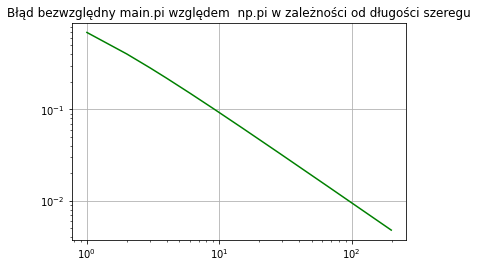

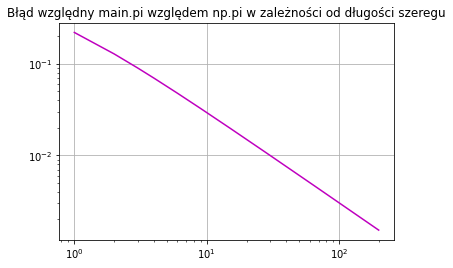

In [27]:
n = [k for k in range(1,200)]
y1 = []
for i in range(0,len(n)):
    y1.append(main.absolut_error(np.pi,main.pi(n[i])))
plt.loglog(n, y1, 'g')
plt.title("Błąd bezwzględny main.pi względem np.pi w zależności od długości szeregu")
plt.grid()

y2 = []
for j in range(0,len(n)):
    y2.append(main.relative_error(np.pi,main.pi(n[j])))
plt.figure()
plt.loglog(n, y2, 'm')
plt.title("Błąd względny main.pi względem np.pi w zależności od długości szeregu")
plt.grid()

Błędy zmiejszają się wraz ze wzrostem liczby n. W przypadku tej funkcji możemy "obciążyć" funkcję stosunkowo dużą wartością argumentu n przez nieskomplikowaność obliczeń w tejże funkcji.

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

SIZE:  1
Timing: 
1.64 µs ± 232 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 106.62 MiB, increment: 0.01 MiB


SIZE:  2
Timing: 
1.13 µs ± 147 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 106.62 MiB, increment: 0.00 MiB


SIZE:  3
Timing: 
1.35 µs ± 165 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 106.62 MiB, increment: 0.00 MiB


SIZE:  4
Timing: 
1.56 µs ± 146 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 106.62 MiB, increment: 0.00 MiB


SIZE:  5
Timing: 
1.79 µs ± 187 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 106.62 MiB, increment: 0.00 MiB


SIZE:  6
Timing: 
1.96 µs ± 137 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 106.62 MiB, increment: 0.00 MiB


SIZE:  7
Timing: 
2.17 µs ± 155 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage

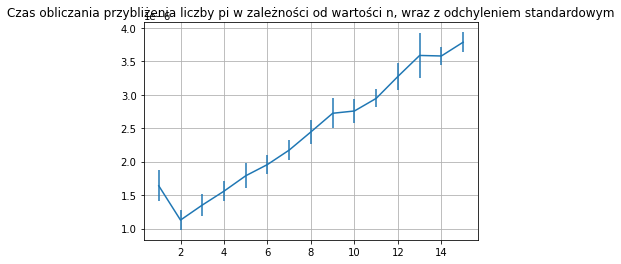

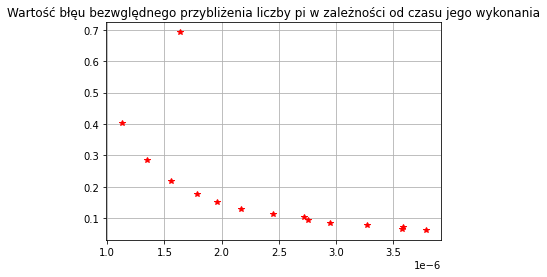

In [24]:
n = [i for i in range(1,16)]
time = []
std = []
err = []

for k in n:
    print('SIZE: ', k)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o main.pi(k)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    time.append(saved_timing.average)
    std.append(saved_timing.stdev)
    err.append(main.absolut_error(np.pi,main.pi(k)))
    %memit main.pi(k)
    print('\n')
plt.errorbar(n,time,yerr = std)
plt.grid()
plt.title("Czas obliczania przybliżenia liczby pi w zależności od wartości n, wraz z odchyleniem standardowym")
plt.show()
plt.figure
plt.plot(time,err,'r*')
plt.grid()
plt.title("Wartość błęu bezwględnego przybliżenia liczby pi w zależności od czasu jego wykonania")
plt.show()

# Wnioski:

Na tym laboratorium napisaliśmy własne numeryczne przybliżenia paru funkcji. Nie są one tak zoptymalizowane jak te wbudowane w bibliotekę numpy, ale mimo to dają bardzo dobry rezultat. Ogólnie rzecz biorąc im więcej było wykonanych iteracji/rekurenci w funkcji, tym lepiej ona przybliżała wartość rzeczywistą. Zapoznalismy się także z zagadnieniem złożoności czasowej i obliczeniowej robiąc odpowiednie testy.